In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from PIL import Image
from pathlib import Path
from PIL import ImageEnhance

In [59]:
DATA_DIR = './train/images_segmented'

In [60]:
df = pd.read_csv('gender.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,path,gender
0,000001_female_Asian_45/incorrect_mask.jpg,1
1,000001_female_Asian_45/mask4.jpg,1
2,000001_female_Asian_45/mask5.jpg,1
3,000001_female_Asian_45/mask1.jpg,1
4,000001_female_Asian_45/normal.jpg,1
...,...,...
18895,006959_male_Asian_19/mask5.jpg,0
18896,006959_male_Asian_19/mask1.jpg,0
18897,006959_male_Asian_19/normal.jpg,0
18898,006959_male_Asian_19/mask2.jpg,0


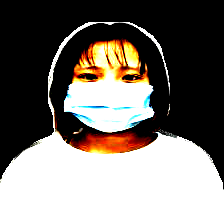

In [64]:
img_path = Path(DATA_DIR) / '003110_female_Asian_19' / 'mask2.jpg'
img = Image.open(img_path)
img = ImageEnhance.Contrast(img).enhance(5)
img

In [40]:
import cv2
import mediapipe as mp

mpDraw = mp.solutions.drawing_utils
mpFaceMesh = mp.solutions.face_mesh
faceMesh = mpFaceMesh.FaceMesh(max_num_faces=1)
drawSpec = mpDraw.DrawingSpec(thickness=1, circle_radius=1)

result = faceMesh.process(img)
if results.multi_face_landmarks:
    for faceLms in results.multi_face_landmarks:
        mpDraw.draw_landmarks(img, faceLms, mpFaceMesh.FACE_CONNECTIONS, drawSpec)

AttributeError: shape

In [ ]:
for id,lm in enumerate(faceLms.landmark):
print(lm)
ih, iw, ic = img.shape
x,y = int(lm.x*iw), int(lm.y*ih)
# uncomment the below line to see the 468 facial landmark
# cv2.putText(img, str(id), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)
print(id, x,y)

cTime = time.time()
fps = 1/(cTime-pTime)
pTime = cTime
cv2.putText(img, f'FPS:{int(fps)}', (20,70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
cv2.imshow("Test", img)
cv2.waitKey(1)

In [97]:
trsfm = A.Compose([
        A.Resize(256,256),
        A.RandomCrop(224, 224),
        A.RandomRotate90(p=0.5),
        A.Blur(blur_limit=3),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=0.1),
        ], p=0.3),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.4),
        A.Sharpen(alpha=(0.5,1.0), lightness=(0.5,1.0), p=0.5),
#         A.Normalize(),
    ])

In [98]:
img = trsfm(image=np.array(img))['image']

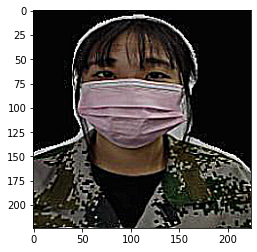

In [99]:
plt.imshow(img)